In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_height,img_width=(224,224)
batch_size=32

train_data_dir = r'C:\Users\aishw\OneDrive\Desktop\Hack and tackle\dataset\train'
valid_data_dir = r'C:\Users\aishw\OneDrive\Desktop\Hack and tackle\dataset\train'
test_data_dir = r'C:\Users\aishw\OneDrive\Desktop\Hack and tackle\dataset\test'

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 1881 images belonging to 2 classes.
Found 1253 images belonging to 2 classes.


In [4]:
test_generator = train_datagen.flow_from_directory(
test_data_dir,
target_size=(img_height,img_width),
            batch_size=1,
            class_mode='categorical',
            subset='validation')

Found 312 images belonging to 2 classes.


In [5]:
x,y=test_generator.next()
x.shape

(1, 224, 224, 3)

In [6]:
base_model = ResNet50(include_top=False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
model.fit(train_generator,epochs=10)
    

Epoch 1/10
59/59 [==============================] - 211s 3s/step - loss: 0.3926 - accuracy: 0.9088
Epoch 2/10
59/59 [==============================] - 197s 3s/step - loss: 0.0407 - accuracy: 0.9918
Epoch 3/10
59/59 [==============================] - 197s 3s/step - loss: 0.0056 - accuracy: 0.9982
Epoch 4/10
59/59 [==============================] - 198s 3s/step - loss: 0.0151 - accuracy: 0.9962
Epoch 5/10
59/59 [==============================] - 203s 3s/step - loss: 0.0081 - accuracy: 0.9982
Epoch 6/10
59/59 [==============================] - 202s 3s/step - loss: 0.0044 - accuracy: 0.9989
Epoch 7/10
59/59 [==============================] - 200s 3s/step - loss: 0.0107 - accuracy: 0.9956
Epoch 8/10
59/59 [==============================] - 113s 2s/step - loss: 0.0075 - accuracy: 0.9980
Epoch 9/10
59/59 [==============================] - 105s 2s/step - loss: 0.0112 - accuracy: 0.9949
Epoch 10/10
59/59 [==============================] - 105s 2s/step - loss: 0.0067 - accuracy: 0.9983


In [7]:
model.save('Resnet_model.h5')

In [8]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

312/312 - 25s - loss: 1.9867e-04 - accuracy: 1.0000

Test accuracy: 1.0


In [9]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    val=np.argmax(val,axis=1)
    print(val)
    if val == 1:
        plt.xlabel("Prosopis",fontsize=30)
        
    
    elif val == 0:
        plt.xlabel("Not Prosopis",fontsize=30)
    return val

[1]


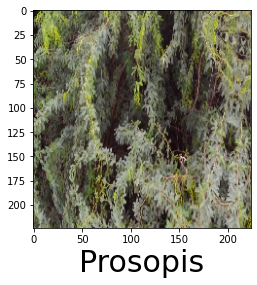

In [10]:
val=predictImage(r'C:\Users\aishw\OneDrive\Desktop\Hack and tackle\dataset\test\prosopis\prosopis.1466.jpeg')

In [44]:
!pip install flask-ngrok

In [11]:
import os
os.mkdir('templates')
os.mkdir('static')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'templates'

In [11]:
index='''
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <title>AI Demo</title>
    <link href="https://cdn.bootcss.com/bootstrap/4.0.0/css/bootstrap.min.css" rel="stylesheet">
    <script src="https://cdn.bootcss.com/popper.js/1.12.9/umd/popper.min.js"></script>
    <script src="https://cdn.bootcss.com/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdn.bootcss.com/bootstrap/4.0.0/js/bootstrap.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/angularjs/1.6.9/angular.min.js"></script> 
    <link href="./static/css/main.css" rel="stylesheet">      
</head>

<body>
    <nav class="navbar navbar-dark bg-dark">
        <div class="container">
            <a class="navbar-brand" href="#">IDENTIFICATION OF PROSOPIS JULIFLORA</a>
            <button class="btn btn-outline-secondary my-2 my-sm-0" type="submit">Help</button>
        </div>
    </nav>
    <div class="container">
        <div id="content" style="margin-top:2em">{% block content %}{% endblock %}</div>
    </div>

<h2>Image Classifier</h2>

<div class="new">
    <form id="upload-file" method="post" enctype="multipart/form-data">
        <label for="imageUpload" class="upload-label">
            Choose...
        </label>
        <input type="file" name="file" id="imageUpload" accept=".png, .jpg, .jpeg">
    </form>

    <div class="image-section" style="display:none;">
        <div class="img-preview">
            <div id="imagePreview">
            </div>
        </div>
        <div>
            <button type="button" class="btn btn-primary btn-lg " id="btn-predict">Predict!</button>
        </div>
    </div>

    <div class="loader" style="display:none;"></div>

    <h3 id="result">
        <span> </span>
    </h3>

</div>
</body>

<footer>
    <script src="./static/js/main.js" type="text/javascript"></script>    
</footer>

</html>
'''
file=open('templates/index.html','w')
file.write(index)
file.close()

In [13]:
os.mkdir('static/css')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'static/css'

In [12]:
main='''
.img-preview {
    width: 256px;
    height: 256px;
    position: relative;
    border: 5px solid #F8F8F8;
    box-shadow: 0px 2px 4px 0px rgba(0, 0, 0, 0.1);
    margin-top: 1em;
    margin-bottom: 1em;    
}

.new{
    margin-left: 10px;
    justify-content: center;
}

.img-preview>div {
    width: 100%;
    height: 100%;
    background-size: 256px 256px;
    background-repeat: no-repeat;
    background-position: center;
}

input[type="file"] {
    display: none;
}

.upload-label{
    display: inline-block;
    padding: 12px 30px;
    background: #39D2B4;
    color: #fff;
    font-size: 1em;
    transition: all .4s;
    cursor: pointer;
}

.upload-label:hover{
    background: #34495E;
    color: #39D2B4;
}

.loader {
    border: 8px solid #f3f3f3; /* Light grey */
    border-top: 8px solid #3498db; /* Blue */
    border-radius: 50%;
    width: 50px;
    height: 50px;
    animation: spin 1s linear infinite;
}

@keyframes spin {
    0% { transform: rotate(0deg); }
    100% { transform: rotate(360deg); }
}
'''
file=open('static/css/main.css','w')
file.write(main)
file.close()

In [15]:
os.mkdir('static/js')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'static/js'

In [13]:
main='''
$(document).ready(function () {
    // Init
    $('.image-section').hide();
    $('.loader').hide();
    $('#result').hide();

    // Upload Preview

    function readURL(input) {
        if (input.files && input.files[0]) {
            var reader = new FileReader();
            reader.onload = function (e) {
                $('#imagePreview').css('background-image', 'url(' + e.target.result + ')');
                $('#imagePreview').hide();
                $('#imagePreview').fadeIn(650);
            }
            reader.readAsDataURL(input.files[0]);
        }
    }
    $("#imageUpload").change(function () {
        $('.image-section').show();
        $('#btn-predict').show();
        $('#result').text('');
        $('#result').hide();
        readURL(this);
    });

    // Predict
    $('#btn-predict').click(function () {
        var form_data = new FormData($('#upload-file')[0]);

        // Show loading animation
        $(this).hide();
        $('.loader').show();

        // Make prediction by calling api /predict
        $.ajax({
            type: 'POST',
            url: '/predict',
            data: form_data,
            contentType: false,
            cache: false,
            processData: false,
            async: true,
            success: function (data) {
                // Get and display the result
                $('.loader').hide();
                $('#result').fadeIn(600);
                $('#result').text(' Result:  ' + data);
                console.log('Success!');
            },
        });
    });

});


'''
file=open('static/js/main.js','w')
file.write(main)
file.close()

In [17]:
os.mkdir('uploads')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'uploads'

In [30]:
!pip install geocoder

In [16]:
data={}
data['locations']=[]
with open('data.txt', 'w') as outfile:
    json.dump(data, outfile)

In [57]:
!pip install requests

In [65]:
pip install boltiot

  Created wheel for boltiot: filename=boltiot-1.11.2-py3-none-any.whl size=4534 sha256=2275c8894d3ddec43b4bf10840eea905f0e139ec411accf0b267c55f4ff0aba6
  Stored in directory: c:\users\aishw\appdata\local\pip\cache\wheels\22\df\b5\1a6a9c3d49c2a778c2131d40db2506710316271682b3b7f797
  Created wheel for twilio: filename=twilio-6.54.0-py2.py3-none-any.whl size=1251893 sha256=df066811d81eedca27de09623a2fbf2f24b84b54a27deb8335c59c20b99a61a1
  Stored in directory: c:\users\aishw\appdata\local\pip\cache\wheels\5f\f3\77\215edc597ef4b17272ad37cbff87fe25814554b0ad08a6bbe1
Successfully built boltiot twilio
Note: you may need to restart the kernel to use updated packages.


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://498db9393f97.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [16/Mar/2021 18:23:51] "GET / HTTP/1.1" 200 -


[0]


127.0.0.1 - - [16/Mar/2021 18:24:09] "POST /predict HTTP/1.1" 200 -


{"value": "1", "success": 1}


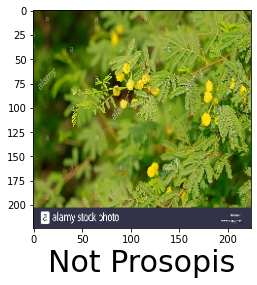

In [18]:
from boltiot import Bolt
import requests                 # for making HTTP requests
import json                     # library for handling JSON data
import time
import os
from flask_ngrok import run_with_ngrok
import json
import requests
from flask import request
from flask import Flask, redirect, url_for, request, render_template,Response
from werkzeug.utils import secure_filename
from keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import cv2
import geocoder
import csv 
import json
app=Flask(__name__)
run_with_ngrok(app)

MODEL_PATH = r'Resnet_model.h5'
model = load_model(MODEL_PATH)

mybolt = Bolt('d449a066-26aa-4510-94a4-0604d3b200ad','BOLT6094741')
#loc=[[0,0]]
#model._make_predict_function() 

def model_predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    x = np.true_divide(x, 255)
    x = np.expand_dims(x, axis=0)

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!

    preds = model.predict(x)
    return preds



 # concat frame one by one and show result

def write_json(data, filename='data.txt'): 
    with open(filename,'w') as f: 
        json.dump(data, f, indent=4) 


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')



@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname('contents')
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = predictImage(file_path)

        # Process your result for human
        #print(preds)
        #preds=np.argmax(preds, axis=1)    
        #print(preds)       # Simple argmax
       # pred_class = decode_predictions(preds, top=1)   # ImageNet Decode
        
        #result = str(pred_class[0][0][1])
        if preds == 0:
            result="not prosopis juliflora"
            response=mybolt.digitalWrite('0','LOW')
            print(response)
        
      
        else:
            result="prosopis juliflora"
            response=mybolt.digitalWrite('0','HIGH')
            print(response)
            g = geocoder.ip('me')
            print(g.latlng)
            #loc.append(g.latlng)
            loc={
                'latitude':g.latlng[0],
                'longitude':g.latlng[1]
            } 
            #loc.append(data)
            #print("locations:")
            #print(loc)
            with open('data.txt') as json_file:
                data = json.load(json_file)
                temp=data["locations"]
                temp.append(loc)
            write_json(data)
        # Convert to string
        return result
    return None

if __name__ == '__main__':
    app.run()